In [ ]:
## Data Ingestion
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df1 = pd.read_csv("E:\DataScience\DataScience\MachineLearning\Yuvraj sir_TRaining\Day1 - Loan_Approval_Prediction\LoanApprovalPrediction.csv")
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount (In lakhs),Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


In [ ]:
## Copy the master data (df1) into df1
df1 = df1

In [ ]:
## Now we will perform EDA
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Loan_ID                457 non-null    object 
 1   Gender                 457 non-null    object 
 2   Married                457 non-null    object 
 3   Dependents             446 non-null    float64
 4   Education              457 non-null    object 
 5   Self_Employed          449 non-null    object 
 6   ApplicantIncome        457 non-null    int64  
 7   CoapplicantIncome      457 non-null    float64
 8   LoanAmount (In lakhs)  457 non-null    int64  
 9   Loan_Amount_Term       443 non-null    float64
 10  Credit_History         418 non-null    float64
 11  Property_Area          457 non-null    object 
 12  Loan_Status            457 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 46.5+ KB


In [ ]:
df1.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount (In lakhs),Loan_Amount_Term,Credit_History
count,446.000000,457.000000,457.000000,457.000000,443.000000,418.000000
mean,0.708520,3764.347921,1555.065470,122.531729,343.611738,0.837321
std,0.992226,1437.039477,2344.023155,35.758872,65.549905,0.369515
min,0.000000,150.000000,0.000000,47.000000,12.000000,0.000000
25%,0.000000,2698.000000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3481.000000,1430.000000,120.000000,360.000000,1.000000
75%,1.000000,4600.000000,2330.000000,144.000000,360.000000,1.000000
max,3.000000,8000.000000,33837.000000,209.000000,480.000000,1.000000


In [ ]:
df1.isna().sum()

Loan_ID                   0
Gender                    0
Married                   0
Dependents               11
Education                 0
Self_Employed             8
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount (In lakhs)     0
Loan_Amount_Term         14
Credit_History           39
Property_Area             0
Loan_Status               0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x267c1bb7c90>,
 'caps': [<matplotlib.lines.Line2D at 0x267c1bb9050>,
 'boxes': [<matplotlib.lines.Line2D at 0x267c1bb73d0>],
 'medians': [<matplotlib.lines.Line2D at 0x267c1bba4d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x267c1bbad50>],
 'means': []}

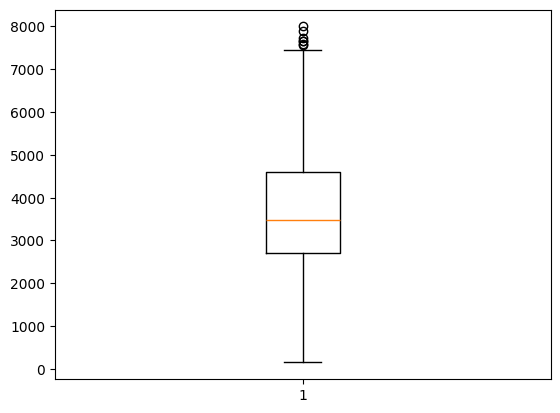

In [ ]:
plt.boxplot(df1['ApplicantIncome'])

In [29]:
## Finding missing values

df1['Gender'].fillna(df1['Gender'].mode()[0], inplace=True)
df1['Married'].fillna(df1['Married'].mode()[0], inplace=True)
df1['Dependents'].fillna(df1['Dependents'].mode()[0], inplace=True)
df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0], inplace=True)
df1['LoanAmount (In lakhs)'].fillna(df1['LoanAmount (In lakhs)'].median(), inplace=True)
df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mode()[0], inplace=True)
df1['Credit_History'].fillna(df1['Credit_History'].mode()[0], inplace=True)

C:\Users\soura\AppData\Local\Temp\ipykernel_16312\400059319.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Gender'].fillna(df1['Gender'].mode()[0], inplace=True)
C:\Users\soura\AppData\Local\Temp\ipykernel_16312\400059319.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [ ]:
## Check to see if missing value still exists 
df1.isna().sum()

Loan_ID                  0
Gender                   0
Married                  0
Dependents               0
Education                0
Self_Employed            0
ApplicantIncome          0
CoapplicantIncome        0
LoanAmount (In lakhs)    0
Loan_Amount_Term         0
Credit_History           0
Property_Area            0
Loan_Status              0
dtype: int64

In [32]:
## drop the unwanted columns    
df1.drop('Loan_ID',axis=1,inplace=True)
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount (In lakhs),Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1.0,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,Male,Yes,0.0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,Male,No,0.0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


In [ ]:
## Convert categorical to numerical
## Used Label Encoder for all categorical columns. 
## DID NOT USE ONE HOT ENCODING BCOZ THIS IS FOR PRACTISING
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = le.fit_transform(df1[col])

df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount (In lakhs),Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1.0,0,0,4583,1508.0,128,360.0,1.0,0,0
1,1,1,0.0,0,1,3000,0.0,66,360.0,1.0,2,1
2,1,1,0.0,1,0,2583,2358.0,120,360.0,1.0,2,1
3,1,0,0.0,0,0,6000,0.0,141,360.0,1.0,2,1
4,1,1,0.0,1,0,2333,1516.0,95,360.0,1.0,2,1
